**K30-IPCV-2021-LQN - OpenCV - Basic**

# Bước 01: Cài đặt thư viện và tải về ảnh sample

In [1]:
# sử dụng phiên bản opencv 3.x
!pip install opencv-python
!pip install opencv-contrib-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)


# Bước 02: Các toán tử cơ bản



In [2]:
#import các lib cần thiết, colab sẽ có sẵn một số thư viện phổ biến, nếu không có có thể cài đặt thêm
import numpy as np
import cv2 #pip install opencv-python
%matplotlib inline
import matplotlib.pyplot as plt

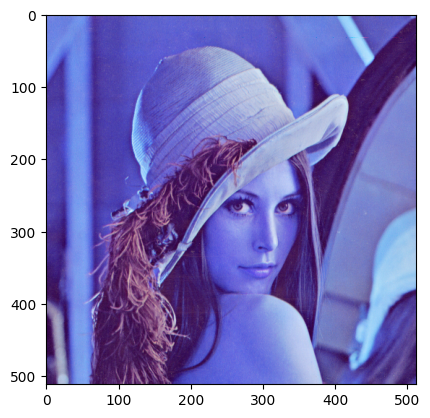

In [3]:
# cv2.imread(	filename[, flags]): hàm tải ảnh lên
# filename: tên file ảnh
# flags: tham số tuỳ chọn hiển thị ảnh, giá trị mặc định là IMREAD_COLOR
# tham khảo thêm các giá trị của flags tại https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80
######
# cv2.IMREAD_COLOR sẽ được giải mã theo thứ tự B G R.
img = cv2.imread('Lenna.png',  cv2.IMREAD_COLOR)
# vì vậy khi hiển thị sẽ bị sai màu
plt.imshow(img)

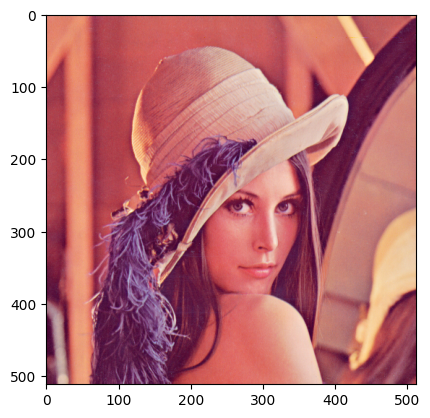

In [4]:
# sử dụng cvtColor để chuyển từ BGR sang RGB lại bằng tham COLOR_BGR2RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
# thông tin của bức ảnh trên, w x h x c 
img.shape

(512, 512, 3)

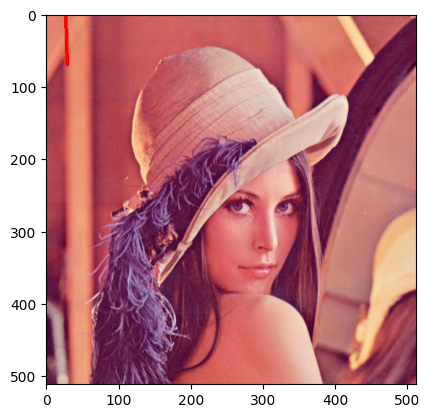

In [6]:
# vẽ đường, đoạn, hình tròn lên ảnh
#cv2.line(image, điểm bắt đầu, điểm kết thúc, màu, độ dày đường)
cv2.line(img, (27,3), (29,70), (255,0,0), 3)
plt.imshow(img)
# tìm hiểu thêm cách vẽ các loại hình khác tại https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html

màu tại vị trí pixel [cột, hàng]:  [255   0   0]


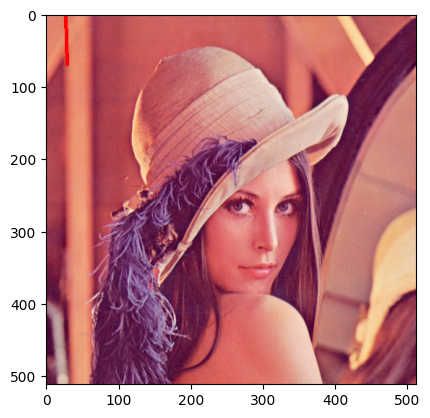

In [7]:
#thay đổi giá trị màu tại một vị trí
print("màu tại vị trí pixel [cột, hàng]: ", img[29, 29])
#đổi màu tại vị trí đó thành màu đen
img[29, 29] = (0,0,0)
plt.imshow(img)

# Bước 03: Ví dụ về edge detection với toán tử Sobel

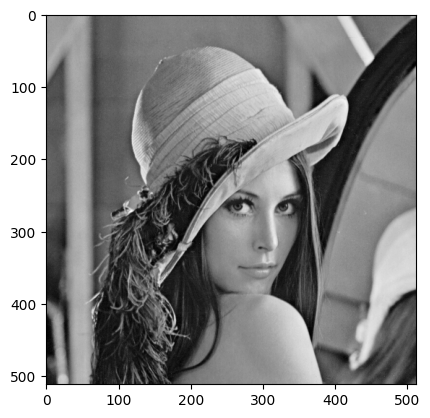

In [8]:
img_gray = cv2.imread('Lenna.png',  cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='gray')

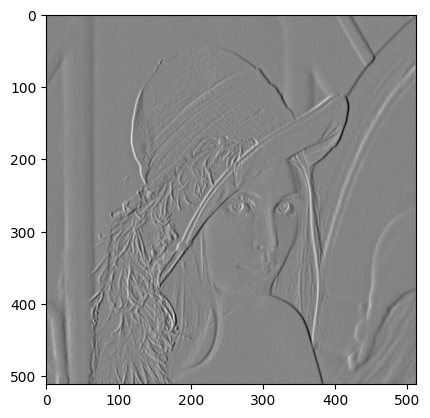

In [12]:
#Edge detection với toán tử sobel
#dst = cv2.Sobel(src, ddepth, dx, dy, ksize=3, scale=1.0)
# https://opencvexamples.blogspot.com/2013/10/sobel-edge-detection.html
# http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html
ddepth = cv2.CV_64F  # 64-bit float output
dx = 1  # đạo hàm bậc 1 theo x
dy = 0  # không đạo hàm theo y
sobelx = cv2.Sobel(img_gray, ddepth, dx, dy)

plt.imshow(sobelx, cmap='gray')

# Bước 04: Ví dụ về SIFT detection

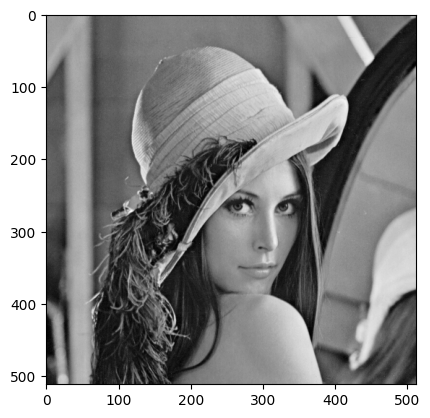

In [10]:
# dir(cv2.xfeatures2d)
img_gray = cv2.imread('Lenna.png',  cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='gray')

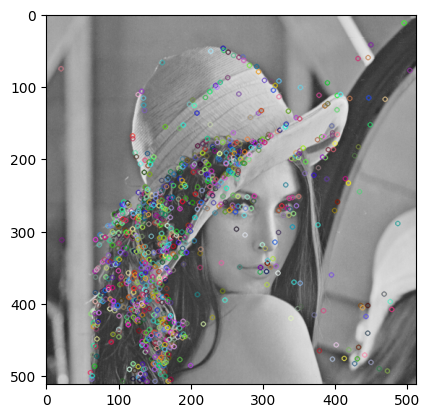

In [11]:
# feature detection - SIFT feature
# đọc lý thuyết tại https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img_gray, None)
img_sift = cv2.drawKeypoints(img_gray, keypoints, None)
plt.imshow(img_sift)